In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data Collection
df= pd.read_excel("Online Retail.xlsx")

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
#data Cleaning
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month'] = df['InvoiceDate'].dt.month


In [6]:
df['month'].value_counts()

month
11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: count, dtype: int64

In [7]:
df = df[(df['month'] == 1) | (df['month'] == 2) | (df['month'] == 3)]


In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31 19:55:00,1.06,16365.0,United Kingdom,3
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31 19:55:00,4.95,16365.0,United Kingdom,3


In [9]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      344
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     29505
Country            0
month              0
dtype: int64

In [10]:
df = df.dropna(subset=['CustomerID'])
#df['CustomerID'] = df['CustomerID'].astype(int)

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31 19:55:00,1.06,16365.0,United Kingdom,3
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31 19:55:00,4.95,16365.0,United Kingdom,3


In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
month          0
dtype: int64

In [13]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31 19:55:00,1.06,16365.0,United Kingdom,3
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31 19:55:00,4.95,16365.0,United Kingdom,3


In [14]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

/var/folders/55/vyhvbrlx6rz89tgtyw8zx6m80000gn/T/ipykernel_40055/2272182375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,TotalPrice
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,1,19.50
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1,10.50
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,1,10.50
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,1,10.50
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,1,12.50
...,...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3,12.75
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31 19:54:00,12.75,17781.0,United Kingdom,3,89.25
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31 19:55:00,1.06,16365.0,United Kingdom,3,106.00
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31 19:55:00,4.95,16365.0,United Kingdom,3,4.95


In [15]:
#preprocessing
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1) # for recency calculation


In [16]:
frequency = df.groupby('CustomerID')['InvoiceDate'].count()

In [17]:
recency= df.groupby('CustomerID')['InvoiceDate'].max()

In [18]:
recency= (snapshot_date-recency).dt.days #recent purchase

In [19]:
monetary= df.groupby('CustomerID')['TotalPrice'].sum() #total spend per customer

In [20]:
print(recency)

CustomerID
12346.0    73
12347.0    65
12348.0    66
12350.0    58
12352.0    10
           ..
18260.0    17
18270.0    14
18273.0     5
18280.0    25
18283.0    32
Name: InvoiceDate, Length: 1776, dtype: int64


In [21]:
customer=pd.DataFrame({ 'Recency':recency,
                       'Frequency':frequency,
                       'Monetary':monetary})

In [22]:
customer['AvgOrderValue']=customer['Monetary']/customer['Frequency']

In [23]:
customer.head()

,Recency,Frequency,Monetary,AvgOrderValue
CustomerID,,,,
12346.0,73,1,77183.60,77183.600000
12347.0,65,29,475.39,16.392759
12348.0,66,6,227.44,37.906667
12350.0,58,17,334.40,19.670588
12352.0,10,38,1561.81,41.100263


In [24]:
#Exploratory Data Analysis (EDA)
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
daily_revenue.rename(columns={'InvoiceDate':'Date', 'TotalPrice':'Revenue'}, inplace=True)


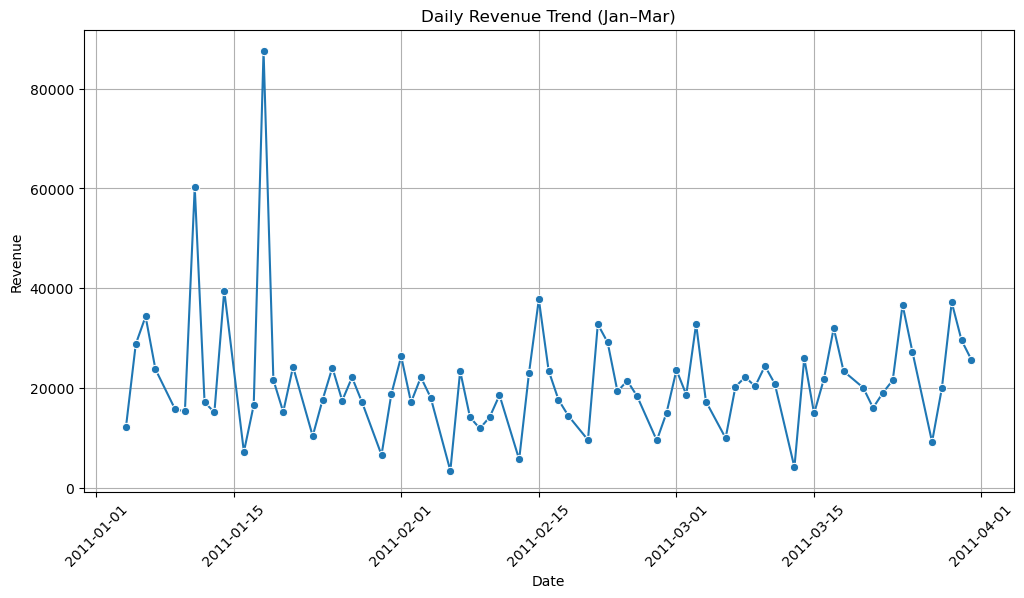

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Revenue', data=daily_revenue, marker='o')
plt.title('Daily Revenue Trend (Jan–Mar)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
daily_transactions = df.groupby(df['InvoiceDate'].dt.date)['InvoiceNo'].nunique().reset_index()
daily_transactions.rename(columns={'InvoiceDate':'Date', 'InvoiceNo':'Transactions'}, inplace=True)

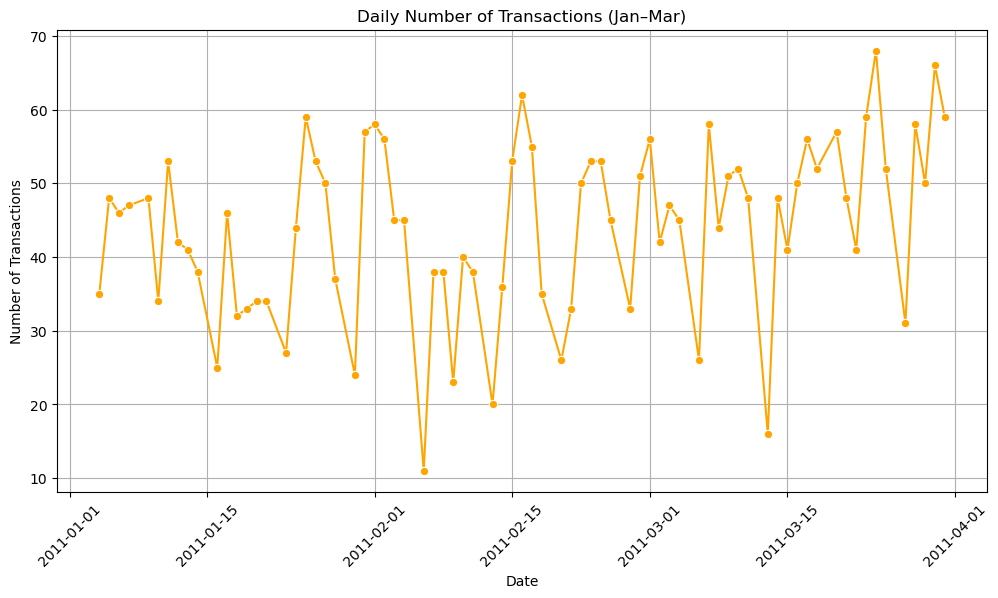

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Transactions', data=daily_transactions, marker='o', color='orange')
plt.title('Daily Number of Transactions (Jan–Mar)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
top_customers = customer.sort_values(by='Monetary', ascending=False).head(10)
print(top_customers[['Monetary']])

            Monetary
CustomerID          
12346.0     77183.60
14646.0     70736.54
12415.0     37842.74
14156.0     35174.67
17450.0     32120.70
15769.0     23089.68
15749.0     22998.40
17511.0     18884.36
18102.0     17444.80
14911.0     17052.84


/var/folders/55/vyhvbrlx6rz89tgtyw8zx6m80000gn/T/ipykernel_40055/1047380670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers['Monetary'], palette='viridis')


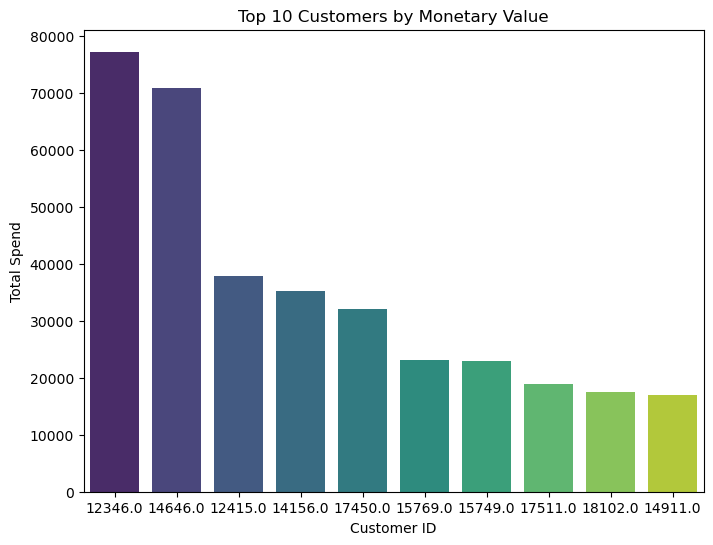

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers['Monetary'], palette='viridis')
plt.title('Top 10 Customers by Monetary Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()

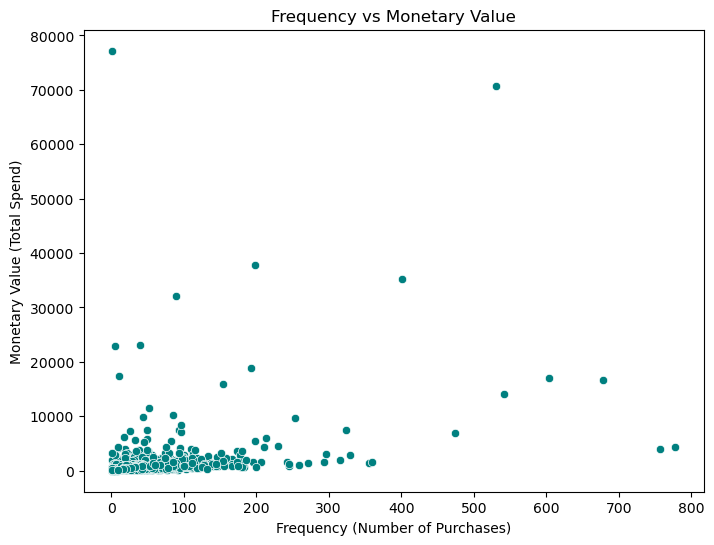

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Frequency', y='Monetary', data=customer, color='teal')
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary Value (Total Spend)')
plt.show()

In [31]:
#Points in the upper-right → high-frequency, high-spend (your loyal VIP customers),Bottom-left → low-frequency, low-spend (one-time buyers),
#Helps visually segment customers for CLV or marketing strategies

In [32]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_revenue)

Country
United Kingdom          1265044.28
Netherlands               72039.56
EIRE                      53705.07
Australia                 40937.12
Germany                   40884.58
France                    40845.63
Spain                     17563.74
Switzerland                8756.38
Sweden                     8716.40
Portugal                   7930.46
Finland                    7031.00
Belgium                    6733.25
Channel Islands            5969.62
Japan                      5829.71
Cyprus                     5820.13
Italy                      4465.32
Denmark                    4378.21
Greece                     3048.55
Austria                    2226.48
Singapore                  2053.07
Norway                     1896.21
Lebanon                    1693.88
Poland                     1535.05
United Arab Emirates        889.24
Israel                      779.10
Czech Republic              549.26
Iceland                     475.39
Saudi Arabia                145.92
Canada      

/var/folders/55/vyhvbrlx6rz89tgtyw8zx6m80000gn/T/ipykernel_40055/524300854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=top_countries, palette='viridis')


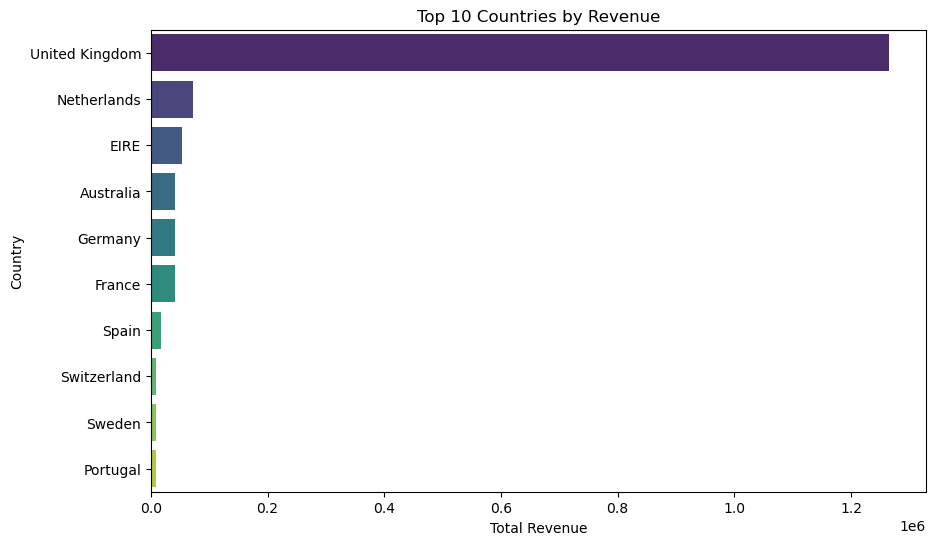

In [33]:
top_countries = country_revenue.head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='TotalPrice', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

In [34]:
rfm_corr = customer[['Recency', 'Frequency', 'Monetary', 'AvgOrderValue']]
corr_matrix = rfm_corr.corr()
print(corr_matrix)

                Recency  Frequency  Monetary  AvgOrderValue
Recency        1.000000  -0.215557 -0.086610       0.041746
Frequency     -0.215557   1.000000  0.374346      -0.022043
Monetary      -0.086610   0.374346  1.000000       0.578878
AvgOrderValue  0.041746  -0.022043  0.578878       1.000000


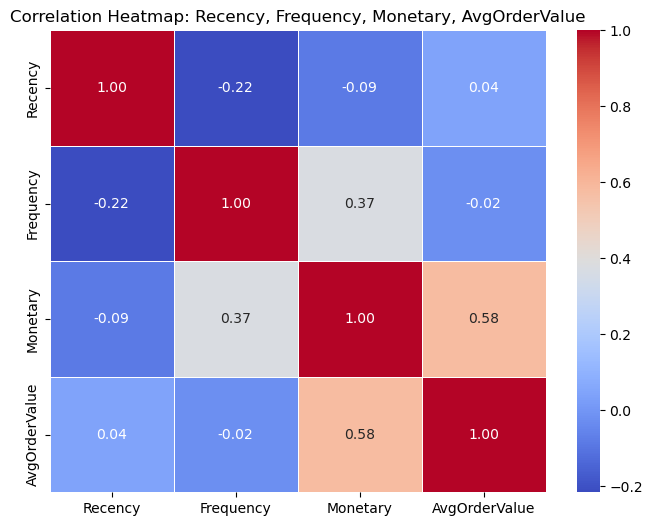

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap: Recency, Frequency, Monetary, AvgOrderValue')
plt.show()

<Axes: >

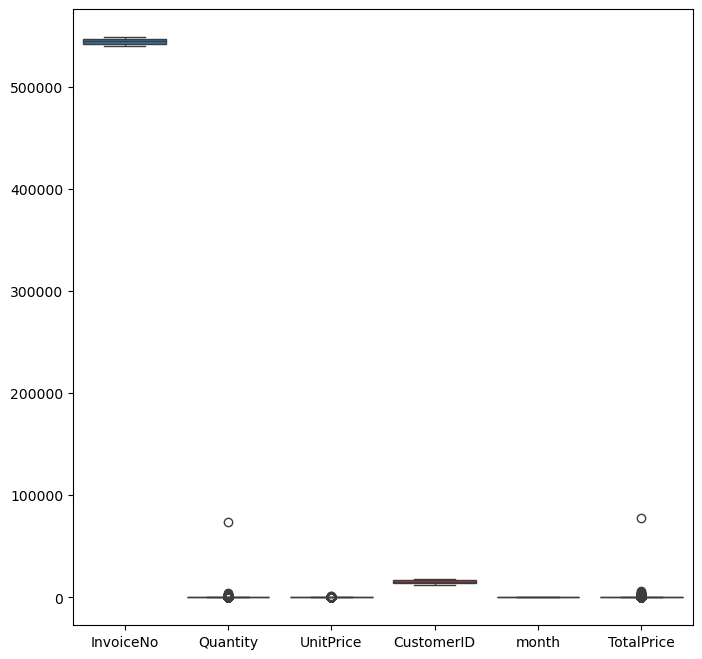

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(df)

In [37]:
#Feature Engineering
order_std = df.groupby('CustomerID')['TotalPrice'].std().fillna(0)
customer['OrderAmountStd'] = order_std

In [38]:
print(customer['OrderAmountStd'])

CustomerID
12346.0     0.000000
12347.0     7.059696
12348.0     8.605325
12350.0     7.275538
12352.0    74.732184
             ...    
18260.0    10.534364
18270.0     9.547146
18273.0     0.000000
18280.0     3.380319
18283.0     1.788760
Name: OrderAmountStd, Length: 1776, dtype: float64


In [39]:
unique_products= df.groupby('CustomerID')['StockCode'].nunique()
customer['UniqueProducts']= unique_products

In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/var/folders/55/vyhvbrlx6rz89tgtyw8zx6m80000gn/T/ipykernel_40055/3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [41]:
df1 = df.sort_values(['CustomerID', 'InvoiceDate'])
df1['PrevPurchaseDate'] = df1.groupby('CustomerID')['InvoiceDate'].shift(1)
df1['DaysBetween'] = (df1['InvoiceDate'] - df1['PrevPurchaseDate']).dt.days

In [42]:
days_stats = df1.groupby('CustomerID')['DaysBetween'].agg(['mean', 'std']).fillna(0)
days_stats.columns = ['MeanDaysBetween', 'StdDaysBetween']

In [43]:
customer = customer.merge(days_stats, on='CustomerID', how='left')

In [44]:
customer.head()

,Recency,Frequency,Monetary,AvgOrderValue,OrderAmountStd,UniqueProducts,MeanDaysBetween,StdDaysBetween
CustomerID,,,,,,,,
12346.0,73,1,77183.60,77183.600000,0.000000,1,0.000000,0.000000
12347.0,65,29,475.39,16.392759,7.059696,29,0.000000,0.000000
12348.0,66,6,227.44,37.906667,8.605325,6,0.000000,0.000000
12350.0,58,17,334.40,19.670588,7.275538,17,0.000000,0.000000
12352.0,10,38,1561.81,41.100263,74.732184,26,0.918919,3.410591


In [45]:
customer.isnull().sum()

Recency            0
Frequency          0
Monetary           0
AvgOrderValue      0
OrderAmountStd     0
UniqueProducts     0
MeanDaysBetween    0
StdDaysBetween     0
dtype: int64

In [46]:
# target = total spend in the 3-month window you used
customer['CLV'] = customer['Monetary']   # short-term CLV

In [47]:
#Model Training
features = ['Recency','Frequency','AvgOrderValue',
            'OrderAmountStd','UniqueProducts',
            'MeanDaysBetween','StdDaysBetween']
X = customer[features]
y = customer['CLV']      

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [50]:
print(X.shape)

(1776, 7)


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
#lr.fit(X,y)

In [52]:
lr.predict([[50,30,50,60,20,0.2,3]])

array([211301.47856535])

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("LR R2:", r2_score(y_test, y_pred_lr))
print("LR MAE:", mean_absolute_error(y_test, y_pred_lr))
print("LR RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))

LR R2: 0.8107998827507796
LR MAE: 409.00902083680086
LR RMSE: 736.678120896246


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("XGB R2:", r2_score(y_test, y_pred_xgb))
print("XGB MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGB RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

XGB R2: -5.536190379121643
XGB MAE: 419.5329074757823
XGB RMSE: 4329.915467249652


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


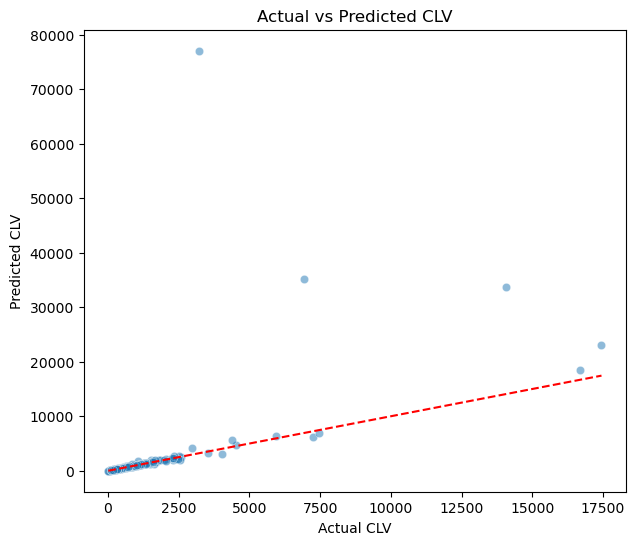

In [56]:
y_pred = best_xgb.predict(X_test_scaled) if 'best_xgb' in globals() else y_pred_xgb

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.show()

In [57]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train_log)
y_pred_log = xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [58]:
customer1 = customer[customer['Monetary'] < customer['Monetary'].quantile(0.99)]

In [59]:
print("XGB R2:", r2_score(y_test, y_pred_log))
print("XGB MAE:", mean_absolute_error(y_test, y_pred_log))
print("XGB RMSE:", mean_squared_error(y_test, y_pred_log, squared=False))

XGB R2: -0.24209960247879958
XGB MAE: 834.5854178733772
XGB RMSE: 1887.5361694119954


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: 0.5835958837469306
MAE: 166.05725856741566
RMSE: 1092.885283782062


In [61]:
print("Linear R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear R2: 0.8107998827507796
Random Forest R2: 0.5835958837469306


In [62]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [0.81, 0.58, -0.24]
mae_scores = [409.00, 166.05, 834.58]  
rmse_scores = [736.67, 1092.88, 1887.53]

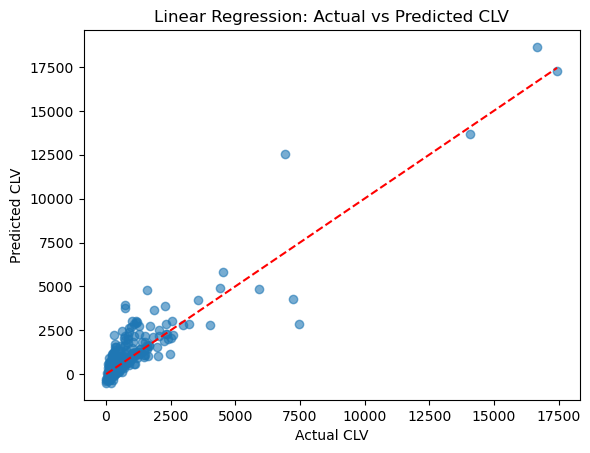

In [63]:
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Linear Regression: Actual vs Predicted CLV")
plt.show()

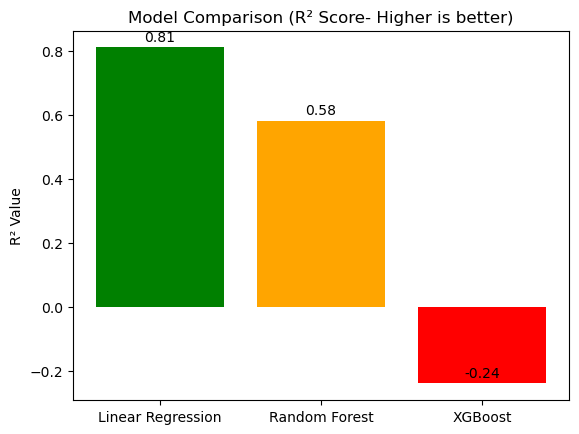

In [64]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [0.81, 0.58, -0.24]

plt.bar(models, r2_scores, color=['green', 'orange', 'red'])
plt.title('Model Comparison (R² Score- Higher is better)')
plt.ylabel('R² Value')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()

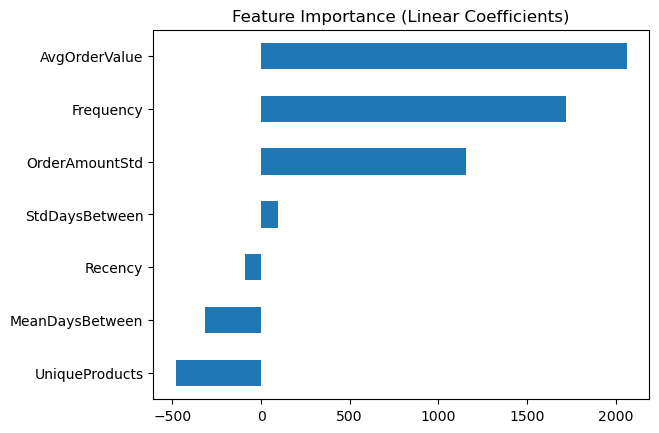

In [65]:
importance = pd.Series(lr.coef_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Linear Coefficients)")
plt.show()

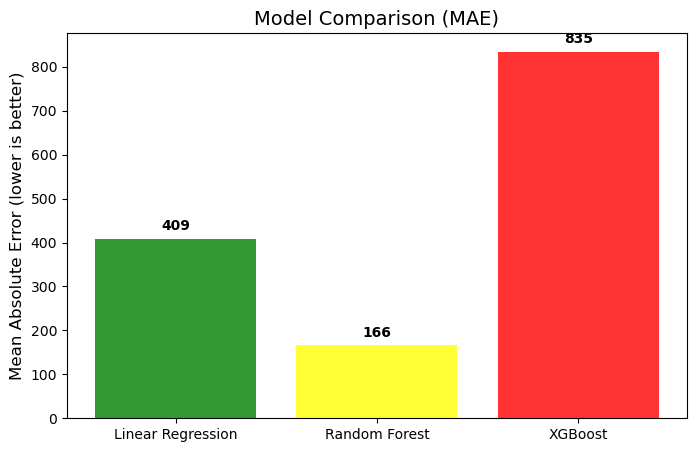

In [66]:
plt.figure(figsize=(8,5))
plt.bar(models, mae_scores, color=['green', 'yellow', 'red'], alpha=0.8)
plt.title('Model Comparison (MAE)', fontsize=14)
plt.ylabel('Mean Absolute Error (lower is better)', fontsize=12)
for i, v in enumerate(mae_scores):
    plt.text(i, v + 20, f"{v:.0f}", ha='center', fontweight='bold')
plt.show()


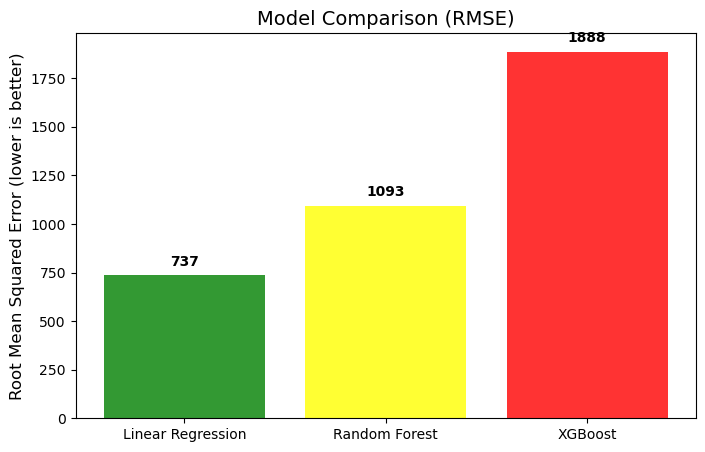

In [67]:
plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores, color=['green', 'yellow', 'red'], alpha=0.8)
plt.title('Model Comparison (RMSE)', fontsize=14)
plt.ylabel('Root Mean Squared Error (lower is better)', fontsize=12)
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 50, f"{v:.0f}", ha='center', fontweight='bold')
plt.show()

In [68]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)
